# 神经网络应用实验
https://www.icourse163.org/learn/FUDAN-1205806833?tid=1470986512&learnMode=0#/learn/hw?id=1243804303

In [10]:
#新闻分类
import keras
import numpy as np
from keras import models
from keras import layers
keras.__version__

'2.13.1'

**数据集介绍**：The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It’s a classic dataset for text classification, and it’s built into Keras, making it easy to experiment with. There are 46 different topics, some more represented than others, but each topic has at least 10 examples in the training set.

In [11]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [63]:
print("Train Data Count", len(train_data))
print("Test Data Count", len(test_data))

# Print the largest index in the word corpus
reuteurs_max_index = reuters.get_word_index()
print(sorted(reuteurs_max_index.values(), reverse=True)[:10])
print("Max Index", max(reuteurs_max_index.values()))

Train Data Count 8982
Test Data Count 2246
[30979, 30978, 30977, 30976, 30975, 30974, 30973, 30972, 30971, 30970]
Max Index 30979


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


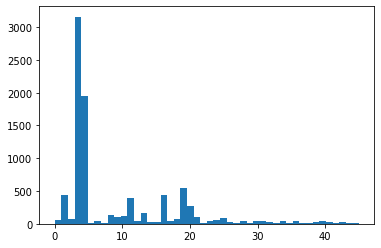

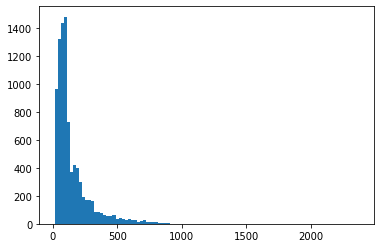

['?', 'the', 'of', 'to', 'in', 'said', 'and']
9999


<Figure size 432x288 with 0 Axes>

In [52]:
print(np.unique(train_labels))

# Distribution of train labels
import matplotlib.pyplot as plt
plt.hist(train_labels, bins=46)
plt.show()
plt.clf()

# Distribution of the lenghts of the news
plt.hist([len(x) for x in train_data], bins=100)
plt.show()
plt.clf()

# Most popular words and their count
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
popular_words = [reverse_word_index.get(i - 3, '?') for i in range(3, 10)]
print(popular_words)

# Print the largest index in each news
print(max([max(sequence) for sequence in train_data]))

In [37]:
print(train_data[10])
print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


In [35]:
# Decode newswire back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 注意，索引减去了3
# 因为0、1、2是为“padding”（填充）、“start of sequence”（序列开始）、“unknown”（未知词）分别保留的索引
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
reuters.get_word_index
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Before we can feed data into a neural network, we need to convert the lists into tensors. We can do this using one-hot encoding.

In [54]:
# Vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print(results.shape)
    for i, sequence in enumerate(sequences): 
        print(i, sequence)
        results[i, sequence] = 1.
    return results

In [55]:
# 将训练数据向量化 
x_train = vectorize_sequences(train_data)
# 将测试数据向量化
x_test = vectorize_sequences(test_data)

print("Words count in corpus", reuters.get_word_index().__len__())
print(len(x_train[10]), x_train[10][:50])

0 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


IndexError: index 3095 is out of bounds for axis 1 with size 1000

We also need to vectorize our labels:

In [19]:
# 将训练标签向量化
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 将训练标签向量化 
one_hot_train_labels = to_one_hot(train_labels)
# 将测试标签向量化
one_hot_test_labels = to_one_hot(test_labels)


In [20]:
# 将训练标签向量化
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 2.6553 - accuracy: 0.5134 - val_loss: 1.7394 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4225 - accuracy: 0.7127 - val_loss: 1.3349 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0624 - accuracy: 0.7796 - val_loss: 1.1522 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8401 - accuracy: 0.8222 - val_loss: 1.0572 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6769 - accuracy: 0.8564 - val_loss: 0.9798 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5417 - accuracy: 0.8844 - val_loss: 0.9207 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4374 - accuracy: 0.9045 - val_loss: 0.9164 - val_accuracy: 0.8180
Epoch 8/20
16/16 [

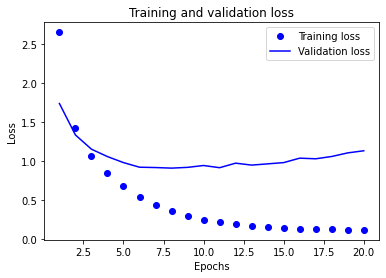

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
# 绘制训练损失和验证损失

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()   # clear figure

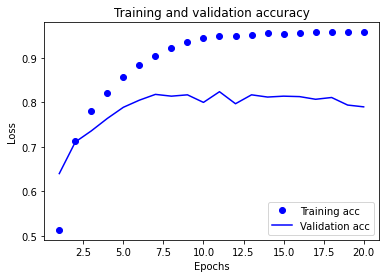

In [23]:
# 绘制训练精度和验证精度
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# 从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/8
16/16 [==============================] - 0s 15ms/step - loss: 2.4962 - accuracy: 0.5417 - val_loss: 1.7094 - val_accuracy: 0.6330
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 1.3994 - accuracy: 0.7006 - val_loss: 1.3072 - val_accuracy: 0.7160
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 1.0485 - accuracy: 0.7776 - val_loss: 1.1356 - val_accuracy: 0.7470
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.8267 - accuracy: 0.8198 - val_loss: 1.0237 - val_accuracy: 0.7760
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.8633 - val_loss: 0.9650 - val_accuracy: 0.7920
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.5236 - accuracy: 0.8916 - val_loss: 0.9176 - val_accuracy: 0.8140
Epoch 7/8
16/16 [==============================] - 0s 10ms/step - loss: 0.4205 - accuracy: 0.9094 - val_loss: 0.8984 - val_accuracy: 0.8150
Epoch 8/8
71/71 [========

[0.9748769998550415, 0.7876224517822266]

In [25]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)
predictions = model.predict(x_test)
predictions[0].shape


71/71 [==============================] - 0s 610us/step


(46,)

In [26]:
np.sum(predictions[0])

1.0

In [27]:
np.argmax(predictions[0])

3